<a href="https://colab.research.google.com/github/lucasresck/deep-learning-and-applications/blob/main/cnn/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for MNIST

Implementation of naive CNN for MNIST prediction.

## Setup

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
# GPU setup
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


## Data

We download the MNIST dataset.

In [ ]:
train_set = torchvision.datasets.MNIST(
    root='data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_set = torchvision.datasets.MNIST(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

We create the dataloaders.

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=64,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=64,
    shuffle=False
)

Example of an image of the dataset:

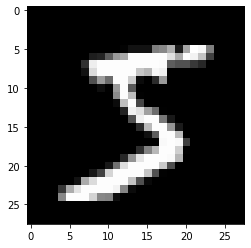

In [ ]:
plt.imshow(train_set[0][0].reshape(28, 28), cmap='gray');

## Model

In [ ]:
# Hyperparameters
lr = 0.001
n_epochs = 5

The model is written in PyTorch. We inherit from `nn.Module` and implement an simple CNN.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.linear1 = nn.Linear(
            in_features=7*7*32,
            out_features=120
        )
        self.linear2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.reshape(-1, 7*7*32)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

The model's loss and optimizer are also simple.

In [ ]:
model = CNN().to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Training

In [ ]:
for epoch in range(n_epochs):
    for i, data in enumerate(train_loader):
        optimizer.zero_grad()

        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 250 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(
                epoch+1,
                n_epochs,
                i+1,
                len(train_loader),
                loss.item()
            ))

Epoch [1/5], Step [250/938], Loss: 0.2482
Epoch [1/5], Step [500/938], Loss: 0.1015
Epoch [1/5], Step [750/938], Loss: 0.0374
Epoch [2/5], Step [250/938], Loss: 0.0376
Epoch [2/5], Step [500/938], Loss: 0.0288
Epoch [2/5], Step [750/938], Loss: 0.0871
Epoch [3/5], Step [250/938], Loss: 0.0314
Epoch [3/5], Step [500/938], Loss: 0.0094
Epoch [3/5], Step [750/938], Loss: 0.0622
Epoch [4/5], Step [250/938], Loss: 0.0106
Epoch [4/5], Step [500/938], Loss: 0.0839
Epoch [4/5], Step [750/938], Loss: 0.0128
Epoch [5/5], Step [250/938], Loss: 0.0052
Epoch [5/5], Step [500/938], Loss: 0.0320
Epoch [5/5], Step [750/938], Loss: 0.0091


## Testing

In test set, we see good performance.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(test_loader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        predicted = torch.max(outputs, 1)[1]
        correct += (predicted == labels).sum().item()
        total += len(predicted)
print("The model's accuracy is {:.2f}%.".format(correct/total*100))

The model's accuracy is 98.71%.
